In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## VSYNC off
vsync disabled in nvidia settings as well as by code in SDL2 Software

In [2]:
PATH = "../data/480hz_test"

In [3]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['pygame_default_False_bitblt_1215e665-212e-48c4-8609-5a7500455ae8.csv',
 'pygame_default_False_getdbits_e08cbbc9-2bc7-4fe2-a3e5-b337468c227f.csv',
 'pygame_default_False_getpixel_5aea92c8-66c4-43c6-b228-9cf3f69971f0.csv',
 'pygame_default_False_windup_python_ac7cd8e0-c82c-4845-886e-9a9d59a81690.csv',
 'pygame_default_True_bitblt_c68fe5b6-3008-4a8c-b15b-d4c63ca9c597.csv',
 'pygame_default_True_getdbits_191b8366-a2ea-4f12-9f22-5808e2689bc1.csv',
 'pygame_default_True_getpixel_8fec195d-0dbc-4270-ab3d-c0bcefd13d9c.csv',
 'pygame_default_True_windup_python_ea814d1b-8982-4085-a8f8-31537442f064.csv',
 'pygame_rects_False_bitblt_110c8073-f902-4f3f-a59e-ee6cd0e0c3ea.csv',
 'pygame_rects_False_getdbits_477f9d76-c85a-4581-be6c-0010fb4f4c62.csv',
 'pygame_rects_False_getpixel_5a2c8f35-623c-46d0-bb9f-05244b4fd979.csv',
 'pygame_rects_False_windup_python_1c9b8a3a-8499-4d52-a658-7aa617a1c440.csv',
 'pygame_rects_True_bitblt_c05cbc08-e7b5-4748-a660-d3e816c32828.csv',
 'pygame_rects_True_getdbits_d87c

In [4]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data = pd.concat(dataframes)

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_13944\3155361841.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


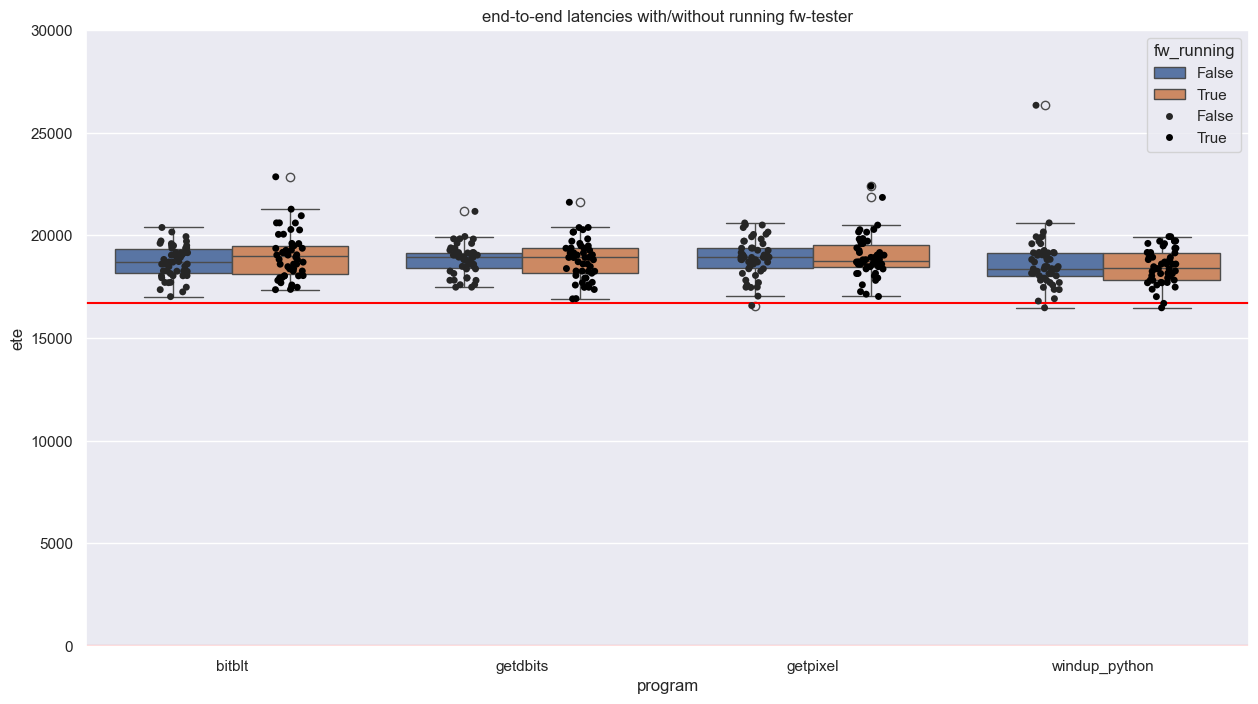

In [11]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 30000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency

C:\Users\tina\AppData\Local\Temp\ipykernel_13944\4216028122.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')


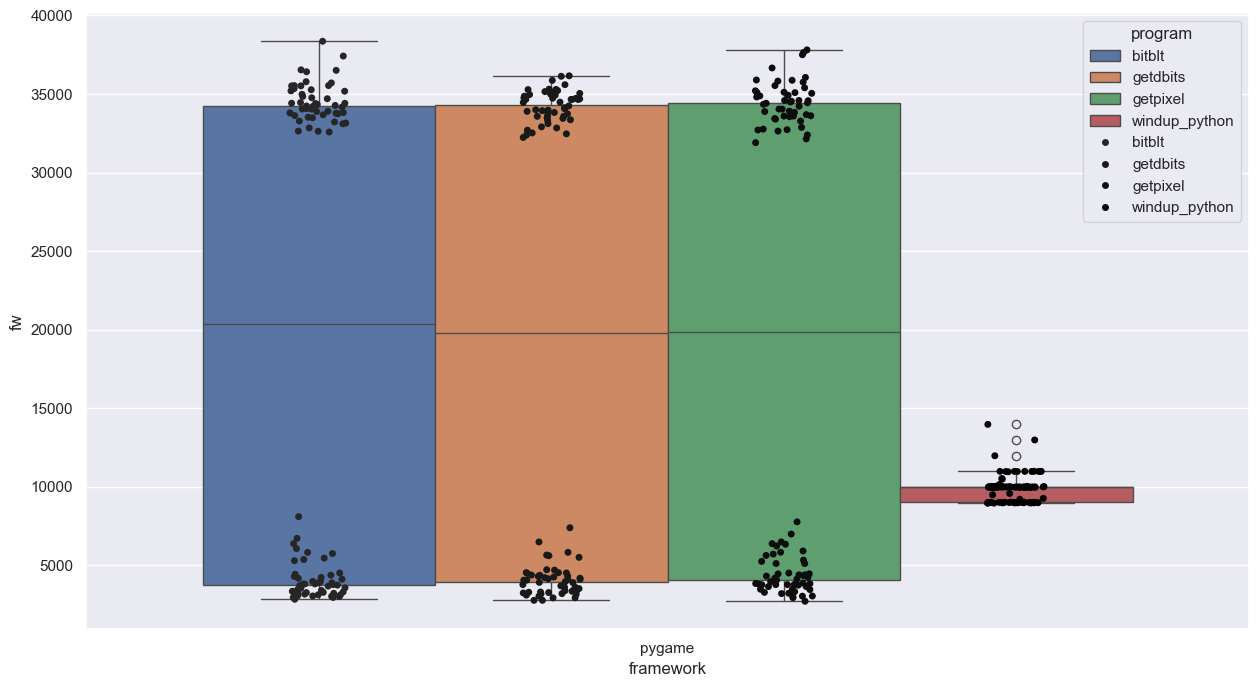

In [12]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
#ax.set_ylim(-1000, 30000)

## Difference (ete and fw) by program

### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_13944\1954006209.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


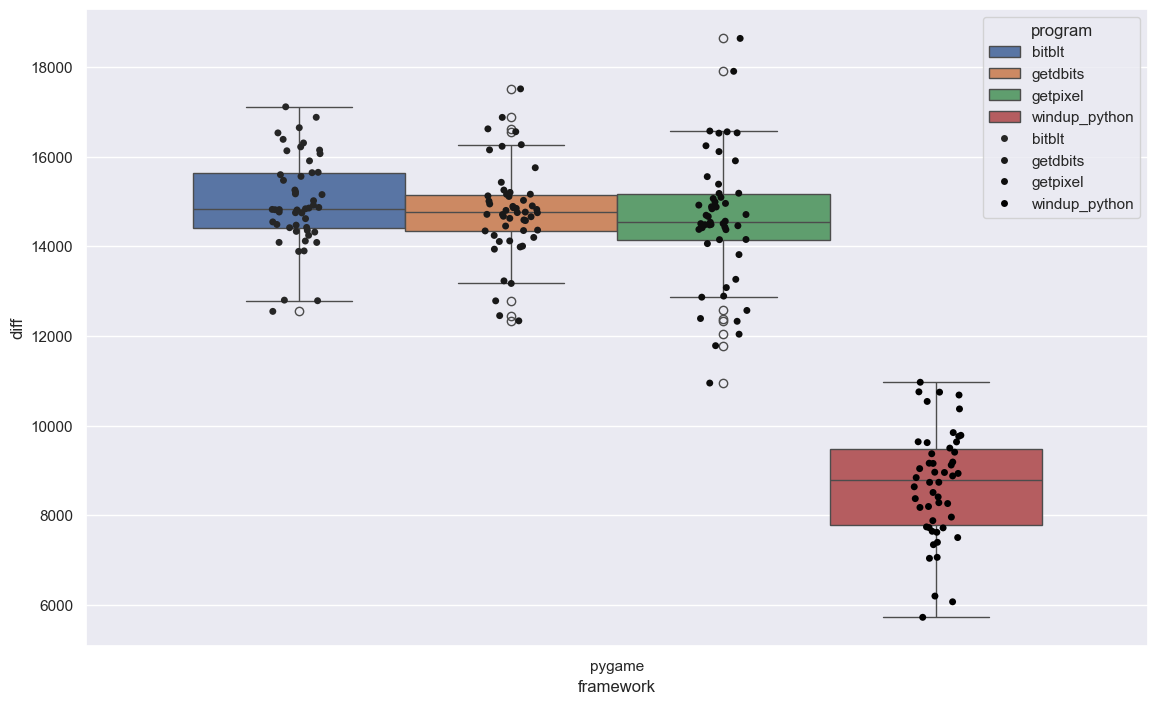

In [7]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
#ax.set_ylim(-80000, 80000)